<a href="https://colab.research.google.com/github/madhuuu9264/MadhuPortfolioProjects/blob/main/Uber_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Uber Analysis using Python -
Phase I & II - Address Temporal Correlation

This notebook contains a basic analysis through some visualizations of the Uber Pickups in New York City data set.

The analysis is broken up into 3 sections:

Data Loading and Preparation.

Exploration and visualization of pickups from April to September 2014.

Conclusion.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.1 Loading **Modules**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
df_apr14=pd.read_csv("/content/drive/My Drive/Uber data analysis project/uber-raw-data-apr14.csv")
df_may14=pd.read_csv("/content/drive/My Drive/Uber data analysis project/uber-raw-data-may14.csv")
df_jun14=pd.read_csv("/content/drive/My Drive/Uber data analysis project/uber-raw-data-jun14.csv")
df_jul14=pd.read_csv("/content/drive/My Drive/Uber data analysis project/uber-raw-data-jul14.csv")
df_aug14=pd.read_csv("/content/drive/My Drive/Uber data analysis project/uber-raw-data-aug14.csv")
df_sep14=pd.read_csv("/content/drive/My Drive/Uber data analysis project/uber-raw-data-sep14.csv")

#Merge the dataframes into one

df = pd.concat([df_apr14,df_may14,df_jun14,df_jul14,df_aug14,df_sep14], ignore_index=True)

##

```
# This is formatted as code
```

### 1.3 Data Preparation

In [ ]:
df.head(10)

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512
5  4/1/2014 0:33:00  40.7383 -74.0403  B02512
6  4/1/2014 0:39:00  40.7223 -73.9887  B02512
7  4/1/2014 0:45:00  40.7620 -73.9790  B02512
8  4/1/2014 0:55:00  40.7524 -73.9960  B02512
9  4/1/2014 1:01:00  40.7575 -73.9846  B02512

In [ ]:
print(len(df))

4534327


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [ ]:
# We are trying to rename and reshape the Date/Time column

df = df.rename(columns = {'Date/Time':'Date_Time'})

print(df['Date_Time'].head(10))

# We are trying to change the datatype of the Date column to datetime format

df['Date_Time'] = pd.to_datetime(df['Date_Time'], format='%m/%d/%Y %H:%M:%S', errors='coerce')

#Adding required columns for analysis to be easier
df['Month'] = df['Date_Time'].dt.month_name()
df['WeekDay'] = df['Date_Time'].dt.day_name()
df['Day'] = df['Date_Time'].dt.day
df['Hour'] = df['Date_Time'].dt.hour
df['Minute'] = df['Date_Time'].dt.minute

0    4/1/2014 0:11:00
1    4/1/2014 0:17:00
2    4/1/2014 0:21:00
3    4/1/2014 0:28:00
4    4/1/2014 0:33:00
5    4/1/2014 0:33:00
6    4/1/2014 0:39:00
7    4/1/2014 0:45:00
8    4/1/2014 0:55:00
9    4/1/2014 1:01:00
Name: Date_Time, dtype: object


In [ ]:
df

Date_Time      Lat      Lon    Base      Month  WeekDay  \
0       2014-04-01 00:11:00  40.7690 -73.9549  B02512      April  Tuesday   
1       2014-04-01 00:17:00  40.7267 -74.0345  B02512      April  Tuesday   
2       2014-04-01 00:21:00  40.7316 -73.9873  B02512      April  Tuesday   
3       2014-04-01 00:28:00  40.7588 -73.9776  B02512      April  Tuesday   
4       2014-04-01 00:33:00  40.7594 -73.9722  B02512      April  Tuesday   
...                     ...      ...      ...     ...        ...      ...   
4534322 2014-09-30 22:57:00  40.7668 -73.9845  B02764  September  Tuesday   
4534323 2014-09-30 22:57:00  40.6911 -74.1773  B02764  September  Tuesday   
4534324 2014-09-30 22:58:00  40.8519 -73.9319  B02764  September  Tuesday   
4534325 2014-09-30 22:58:00  40.7081 -74.0066  B02764  September  Tuesday   
4534326 2014-09-30 22:58:00  40.7140 -73.9496  B02764  September  Tuesday   

         Day  Hour  Minute  
0          1     0      11  
1          1     0      17  
2          1     0      21  
3          1     0      28  
4          1     0      33  
...      ...   ...     ...  
4534322   30    22      57  
4534323   30    22      57  
4534324   30    22      58  
4534325   30    22      58  
4534326   30    22      58  

[4534327 rows x 9 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date_Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Month      object        
 5   WeekDay    object        
 6   Day        int32         
 7   Hour       int32         
 8   Minute     int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 259.5+ MB


In [ ]:
df.describe(include = 'all')

Date_Time           Lat           Lon     Base  \
count                         4534327  4.534327e+06  4.534327e+06  4534327   
unique                            NaN           NaN           NaN        5   
top                               NaN           NaN           NaN   B02617   
freq                              NaN           NaN           NaN  1458853   
mean    2014-07-11 18:50:50.578151424  4.073926e+01 -7.397302e+01      NaN   
min               2014-04-01 00:00:00  3.965690e+01 -7.492900e+01      NaN   
25%               2014-05-28 15:18:00  4.072110e+01 -7.399650e+01      NaN   
50%               2014-07-17 14:45:00  4.074220e+01 -7.398340e+01      NaN   
75%               2014-08-27 21:55:00  4.076100e+01 -7.396530e+01      NaN   
max               2014-09-30 22:59:00  4.211660e+01 -7.206660e+01      NaN   
std                               NaN  3.994991e-02  5.726670e-02      NaN   

            Month   WeekDay           Day          Hour        Minute  
count     4534327   4534327  4.534327e+06  4.534327e+06  4.534327e+06  
unique          6         7           NaN           NaN           NaN  
top     September  Thursday           NaN           NaN           NaN  
freq      1028136    755145           NaN           NaN           NaN  
mean          NaN       NaN  1.594337e+01  1.421831e+01  2.940071e+01  
min           NaN       NaN  1.000000e+00  0.000000e+00  0.000000e+00  
25%           NaN       NaN  9.000000e+00  1.000000e+01  1.400000e+01  
50%           NaN       NaN  1.600000e+01  1.500000e+01  2.900000e+01  
75%           NaN       NaN  2.300000e+01  1.900000e+01  4.400000e+01  
max           NaN       NaN  3.100000e+01  2.300000e+01  5.900000e+01  
std           NaN       NaN  8.744902e+00  5.958759e+00  1.732238e+01

## 2. Exploration and Visualization

Through our exploration we are going to visualize and analyse:

The number of trips by hour

The number of trips by month

The number of trips by weekday

The number of trips by day

The number of trips by hour and month

The number of trips by weekday and hour

The number of trips by weekday and month

In [ ]:
df_hour_grouped = df.groupby(['Hour']).count()

#Creating the sub dataframe
df_hour = pd.DataFrame({'Number_of_trips':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index)

df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 23
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Number_of_trips  24 non-null     int64
dtypes: int64(1)
memory usage: 288.0 bytes


Plotting the results

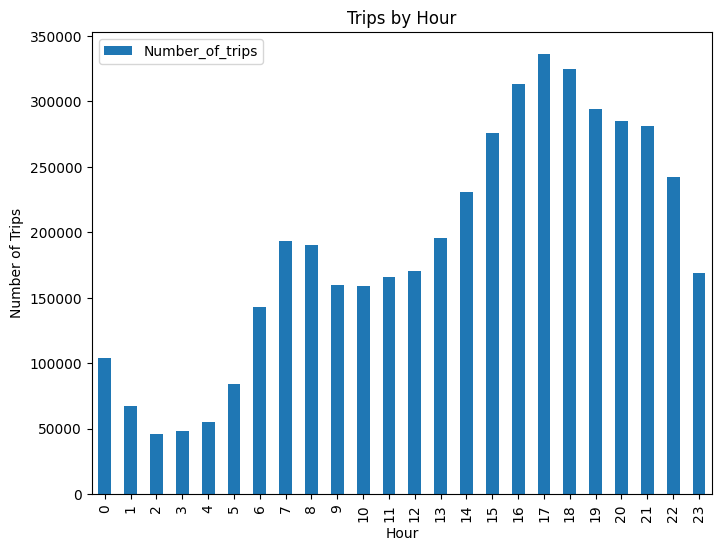

In [ ]:
df_hour.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Hour')

plt.show()

Analying the results

In [ ]:
#The highest number of trips by hour
max_Number_of_trips_hour = max(df_hour['Number_of_trips'])
max_hour = df_hour[df_hour['Number_of_trips'] == 336190].index[0]

print('The highest number of trips by hour is {} trip, that corresponds to the peak hour {}:00.'.format(max_Number_of_trips_hour, max_hour))


The highest number of trips by hour is 336190 trip, that corresponds to the peak hour 17:00.


## **We observe that the number of trips are higher around 16:00 and 18:00, with a spike at 17:00. It matches the end of a working day in the United States (16:30), the time when the workers go home.**

## **We can say that a big part of Uber's clients are workers.**

In [ ]:
#Grouping by Month
df_month_grouped = df.groupby(['Month'], sort=False).count()

#Creating the sub dataframe
df_month = pd.DataFrame({'Number_of_trips':df_month_grouped.values[:,0]}, index = df_month_grouped.index)

df_month

Number_of_trips
Month                     
April               564516
May                 652435
June                663844
July                796121
August              829275
September          1028136

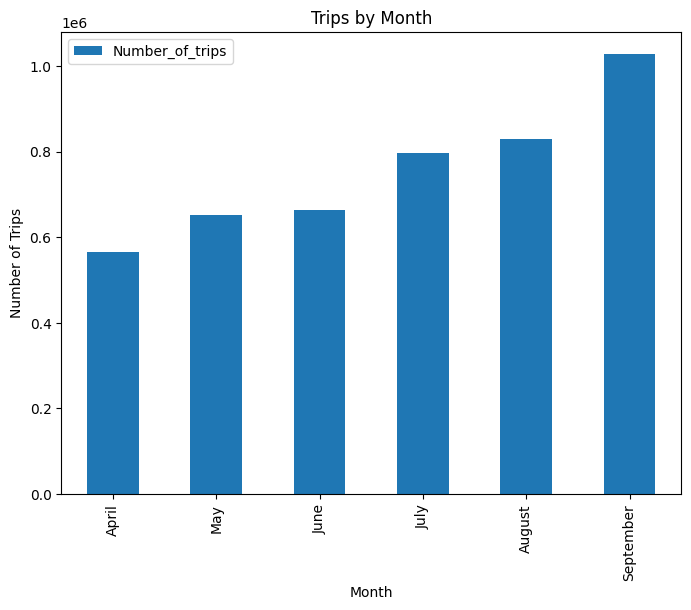

In [ ]:
df_month.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Month')

plt.show()

#### Analysing the results

In [ ]:
number_of_trips_aug = df_month.loc['August'].values
number_of_trips_sep = df_month.loc['September'].values

ratio_month = (((number_of_trips_sep - number_of_trips_aug) / number_of_trips_aug) * 100)[0]
ratio_month = round(ratio_month)

print('The ratio of the increase from August to September is {} %.'.format(ratio_month))


The ratio of the increase from August to September is 24 %.


### From our results we can say that from April to September 2014, Uber was in a continuous improvement process.


### 2.3 Trips by weekday

In [ ]:
#Grouping by Weekday

df['weekday'] = pd.to_datetime(df['Date_Time']).dt.day_name()
df_weekday_grouped = df.groupby(['weekday'], sort = False).count()

#Creating the grouped DataFrame
df_weekday = pd.DataFrame({'Number_of_trips':df_weekday_grouped.values[:,0]}, index = df_weekday_grouped.index)

df_weekday

#Creating the grouped DataFrame
df_weekday = pd.DataFrame({'Number_of_trips':df_weekday_grouped.values[:,0]}, index = df_weekday_grouped.index)

df_weekday

Number_of_trips
weekday                   
Tuesday             663789
Wednesday           696488
Thursday            755145
Friday              741139
Saturday            646114
Sunday              490180
Monday              541472

In [ ]:
print(df.columns)

Index(['Date_Time', 'Lat', 'Lon', 'Base', 'Month', 'WeekDay', 'Day', 'Hour',
       'Minute', 'weekday'],
      dtype='object')


#### Plotting the results

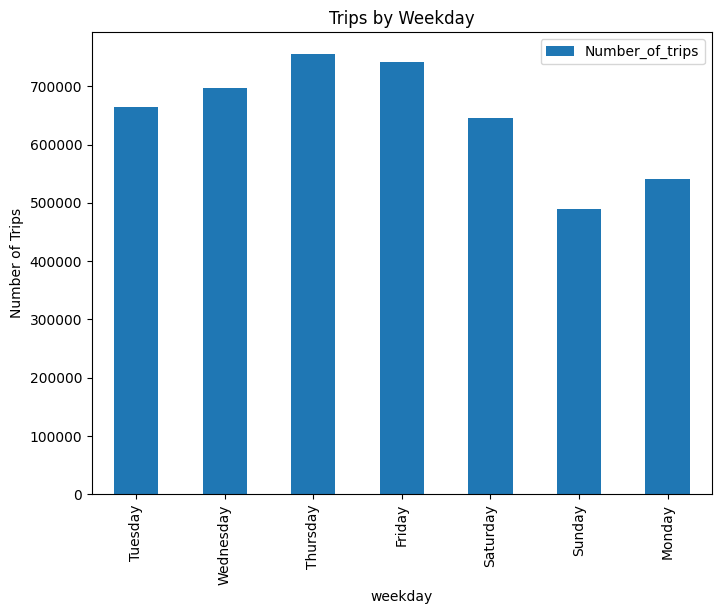

In [ ]:
df_weekday.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Weekday')

plt.show()

#### Analysing the results

In [ ]:
#Getting the minimum number of trips by weekday
min_number_of_trips_weekday = min(df_weekday['Number_of_trips'])

#Getting the weekday where the number of trips is minimal
min_weekday = df_weekday[df_weekday['Number_of_trips'] == min_number_of_trips_weekday].index[0]

print('The lowest number of trips by weekday is {} trip, that corresponds to {}.'.format(min_number_of_trips_weekday, min_weekday))

The lowest number of trips by weekday is 490180 trip, that corresponds to Sunday.


In [ ]:
#Getting the mean number of trips in the weekend - Non working day
mean_number_of_trips_weekend = ((df_weekday.loc['Saturday'] + df_weekday.loc['Sunday']) / 2).values

#Getting the mean number of trips for the rest of the week- Working day
mean_number_of_trips_workday = (((df_weekday.loc['Monday'] + df_weekday.loc['Tuesday'] + df_weekday.loc['Wednesday'] + df_weekday.loc['Thursday'] + df_weekday.loc['Friday'])/ 5).values)[0]

ratio_weekday = (((mean_number_of_trips_workday - mean_number_of_trips_weekend) / mean_number_of_trips_weekend) * 100)[0]
ratio_weekday = round(ratio_weekday, 1)

print('The mean number of trips during working days is {}% higher than the mean number of trips during weekends.'.format(ratio_weekday))

The mean number of trips during working days is 19.6% higher than the mean number of trips during weekends.


###As the ratio between workdays and weekends only 19.6%, and because of the low number of trips on Monday, it cannot be said that people use Uber on workdays more than on weekends.

###We need to investigate more to find out why the number of trips on mondays is as low.

### 2.4 Trips by day

In [ ]:
df_day_grouped = df.groupby(['Day']).count()

#Creating the grouped DataFrame
df_day = pd.DataFrame({'Number_of_trips':df_day_grouped.values[:,0]}, index = df_day_grouped.index)

df_day.head()

Number_of_trips
Day                 
1             127430
2             143201
3             142983
4             140923
5             147054

Plotting the results

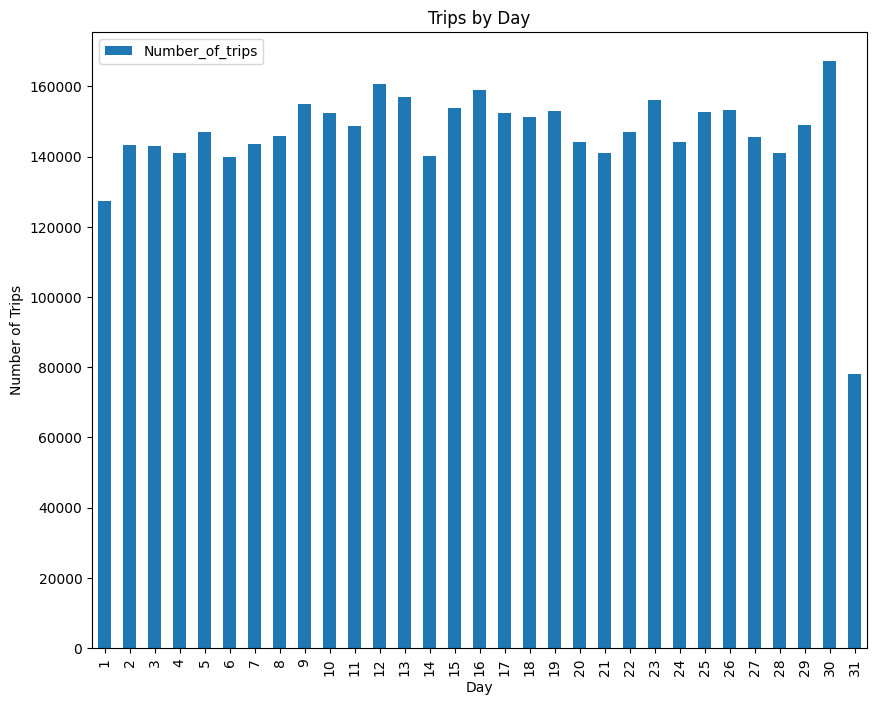

In [ ]:
df_day.plot(kind='bar', figsize=(10,8))

plt.ylabel('Number of Trips')
plt.title('Trips by Day')

plt.show()

###The number of trips for the day 31 is a lot less than the others because April, June and September have 30 days.

###The day with the highest number of trips is the 30. There's not much variation from day to day.

In [ ]:
#Grouping by Hour and Month
df['Hour'] = pd.to_datetime(df['Date_Time']).dt.hour
df['Month'] = pd.to_datetime(df['Date_Time']).dt.month
df_hour_month_grouped = df.groupby(['Hour','Month']).count()

#Creating the grouped DataFrame
df_hour_month = pd.DataFrame({'Number_of_trips':df_hour_month_grouped.values[:,1]}, index = df_hour_month_grouped.index)

df_hour_month.head(10)

Number_of_trips
Hour Month                 
0    4                11910
     5                13875
     6                14514
     7                17953
     8                21451
     9                24133
1    4                 7769
     5                 8186
     6                 9167
     7                11527

In [ ]:
#Reseting the Index
df_hour_month.reset_index(inplace= True)
df_hour_month.head()

Hour  Month  Number_of_trips
0     0      4            11910
1     0      5            13875
2     0      6            14514
3     0      7            17953
4     0      8            21451

In [ ]:
#Preparing the Number of trips data
#We create a Numpy array that includes the Number of trips data then reshape it to fit our
data_hour_month = df_hour_month['Number_of_trips'].values.reshape(24,6)
data_hour_month

array([[11910, 13875, 14514, 17953, 21451, 24133],
       [ 7769,  8186,  9167, 11527, 14471, 16107],
       [ 4935,  5372,  6189,  8562, 10105, 10702],
       [ 5040,  5946,  6937,  9199, 10376, 10789],
       [ 6095,  6945,  7701, 10040, 11774, 12675],
       [ 9476, 10789, 11955, 14932, 16525, 20262],
       [18498, 21015, 22030, 23456, 24907, 33307],
       [24924, 27413, 30834, 32545, 34064, 43314],
       [22843, 25460, 29771, 33387, 34566, 44477],
       [17939, 20507, 24298, 28486, 30195, 38542],
       [17865, 20801, 23584, 28558, 30706, 37634],
       [18774, 22055, 24155, 30120, 31778, 38821],
       [19425, 23595, 25233, 30900, 32106, 39193],
       [22603, 27699, 28937, 35832, 35764, 45042],
       [27190, 34363, 34428, 41357, 40644, 52643],
       [35324, 43087, 41586, 46053, 48197, 61219],
       [42003, 49127, 48162, 52403, 53481, 68224],
       [45475, 51508, 50452, 58260, 57122, 73373],
       [43003, 48965, 45013, 57268, 55390, 75040],
       [38923, 42387, 38203, 52

In [ ]:
df_hour_month = pd.DataFrame(data = data_hour_month, index = df_hour_month['Hour'].unique(), columns = df['Month'].unique())
df_hour_month.head()

4      5      6      7      8      9
0  11910  13875  14514  17953  21451  24133
1   7769   8186   9167  11527  14471  16107
2   4935   5372   6189   8562  10105  10702
3   5040   5946   6937   9199  10376  10789
4   6095   6945   7701  10040  11774  12675

Plotting the results

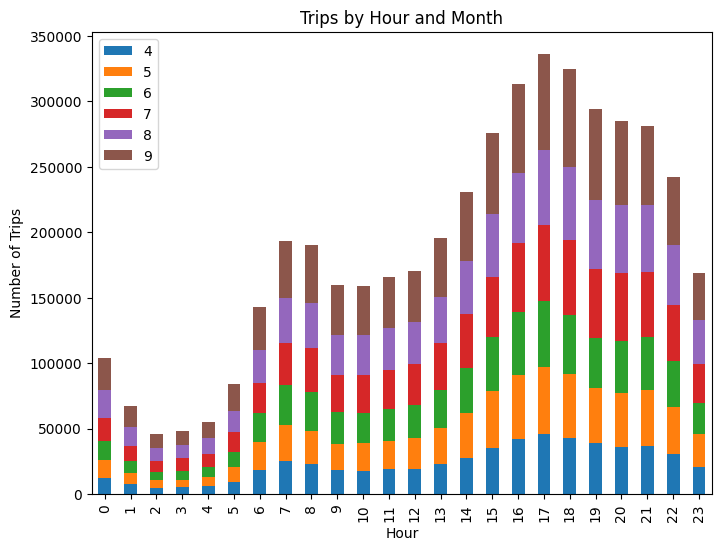

In [ ]:
#Staccked Bar plot
df_hour_month.plot(kind='bar', figsize=(8,6), stacked=True)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')

plt.show()

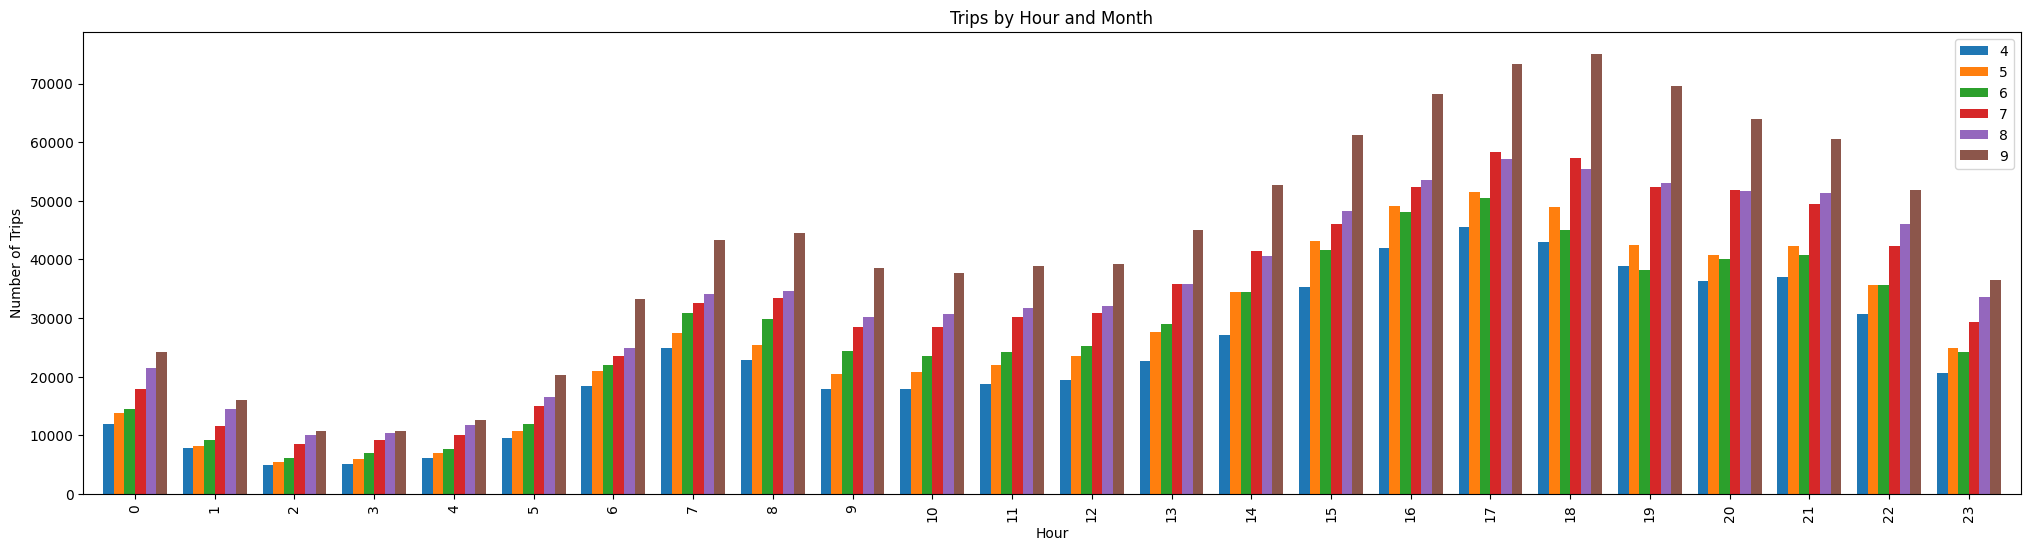

In [ ]:
## Width Bar plot
df_hour_month.plot(kind='bar', figsize=(25,6),width=0.8)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')

plt.show()

2.6 Trips by weekday and hour

In [ ]:
#Grouping by Hour and weekday
df_weekday_hour_grouped = df.groupby(['weekday','Hour'], sort = False).count()

#Creating the grouped DataFrame
df_weekday_hour = pd.DataFrame({'Number_of_trips':df_weekday_hour_grouped.values[:,1]}, index = df_weekday_hour_grouped.index)

df_weekday_hour

Number_of_trips
weekday Hour                 
Tuesday 0                6237
        1                3509
        2                2571
        3                4494
        4                7548
...                       ...
Monday  19              34159
        20              32849
        21              28925
        22              20158
        23              11811

[168 rows x 1 columns]

Values
Category        
A             10
B             14
C             12

In [ ]:
#Reseting the Index
df_weekday_hour.reset_index(inplace= True)

#Preparing the Number of trips data
data_weekday_hour = df_weekday_hour['Number_of_trips'].values.reshape(7,24)

# df_weekday_hour = pd.DataFrame(data = data_weekday_hour, index = df_weekday_hour['Weekday'].unique(), columns = df['Hour'].unique())
df_weekday_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   weekday          168 non-null    object
 1   Hour             168 non-null    int32 
 2   Number_of_trips  168 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 3.4+ KB


In [ ]:
df_weekday_hour.head()

weekday  Hour  Number_of_trips
0  Tuesday     0             6237
1  Tuesday     1             3509
2  Tuesday     2             2571
3  Tuesday     3             4494
4  Tuesday     4             7548

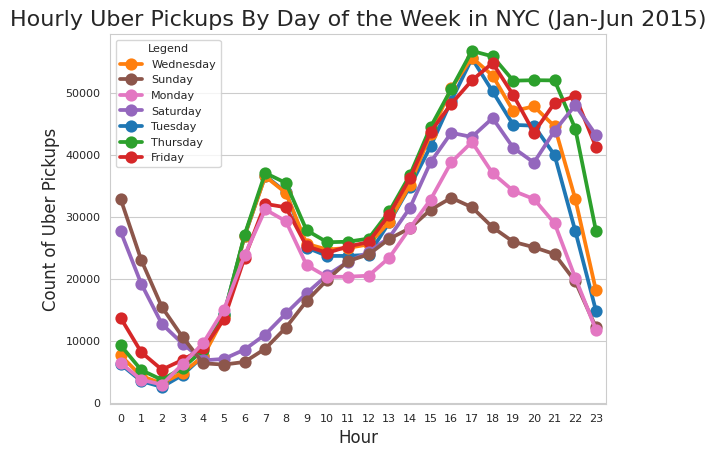

In [ ]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
figb , axp = plt.subplots()
sns.set_style('whitegrid')
axp = sns.pointplot(x="Hour", y="Number_of_trips", hue="weekday", data=df_weekday_hour)
handles,labels = axp.get_legend_handles_labels()
#reordering legend content
handles = [handles[1], handles[5], handles[6], handles[4], handles[0], handles[2], handles[3]]
labels = [labels[1], labels[5], labels[6], labels[4], labels[0], labels[2], labels[3]]
axp.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axp.set_xlabel('Hour', fontsize = 12)
axp.set_ylabel('Count of Uber Pickups', fontsize = 12)
axp.set_title('Hourly Uber Pickups By Day of the Week in NYC (Jan-Jun 2015)', fontsize=16)
axp.tick_params(labelsize = 8)
axp.legend(handles,labels,loc=0, title="Legend", prop={'size':8})
axp.get_legend().get_title().set_fontsize('8')
plt.show()

Plotting the results

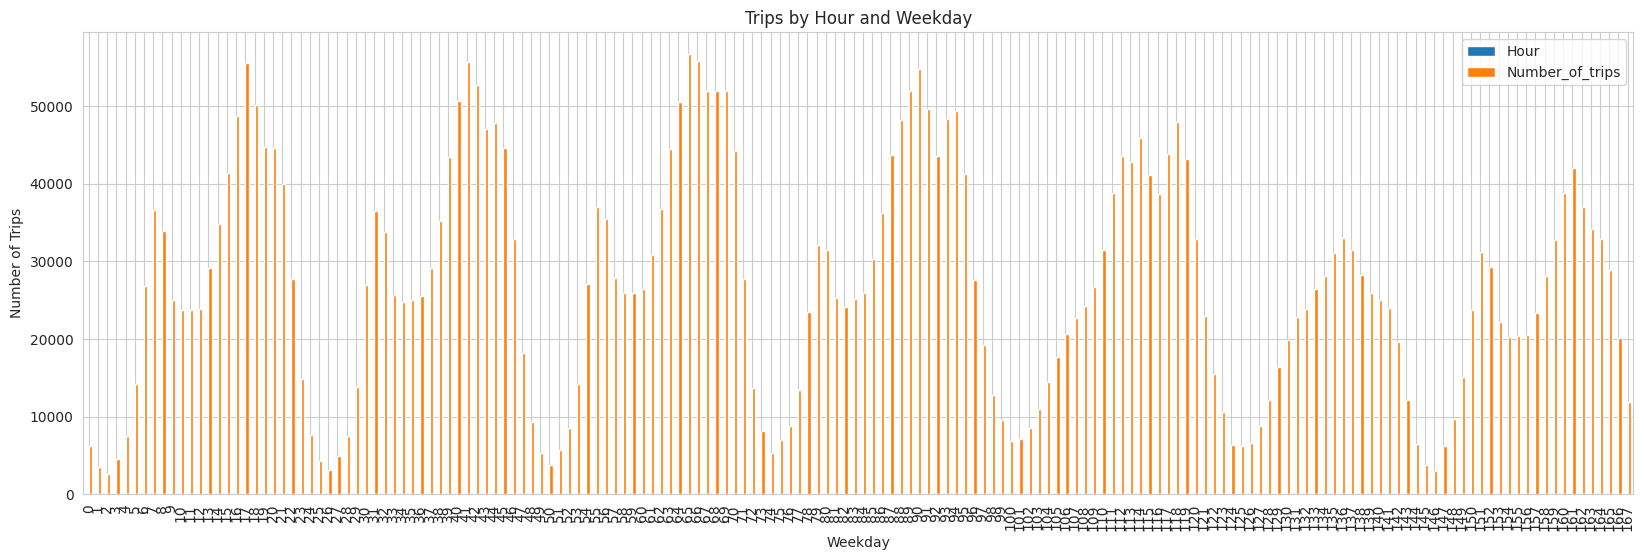

In [ ]:
df_weekday_hour.plot(kind='bar', figsize=(20,6), width = 0.7)

plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Weekday')

plt.show()

Analysing the results

###**We see that in working days there's a pulse at 7:00 and 8:00, it corresponds to the hour where the employees go to work. This pulse is not present on weekend days.**

###**At the same time we see that on weekend days the number of trips around midnight, 1:00 and 2:00 is higher than on working days.**

2.7 Trips by weekday and month

In [ ]:
#Grouping by Weekday and Month
df_month_weekday_grouped = df.groupby(['Month','weekday'], sort=False).count()

#Creating the grouped DataFrame
df_month_weekday = pd.DataFrame({'Number_of_trips':df_month_weekday_grouped.values[:,1]}, index = df_month_weekday_grouped.index)

df_month_weekday.head(10)

Number_of_trips
Month weekday                   
April Tuesday              91185
      Wednesday           108631
      Thursday             85067
      Friday               90303
      Saturday             77218
      Sunday               51251
      Monday               60861
May   Thursday            128921
      Friday              133991
      Saturday            102990

In [ ]:
#Reseting the Index
df_month_weekday.reset_index(inplace= True)

#Preparing the Number of trips
data_month_weekday = df_month_weekday['Number_of_trips'].values.reshape(6,7)

df_month_weekday = pd.DataFrame(data = data_month_weekday, index = df_month_weekday['Month'].unique(), columns = df['weekday'].unique())
df_month_weekday.head()

Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  Monday
April     91185     108631     85067   90303     77218   51251   60861
May      128921     133991    102990   56168     63846   76662   89857
June      79656      94655     88134   99654    115325  105056   81364
July     137454     147717    148439  102735     90260   76327   93189
August   148674     132225    110246   91633    107124  115256  124117

Plotting the results

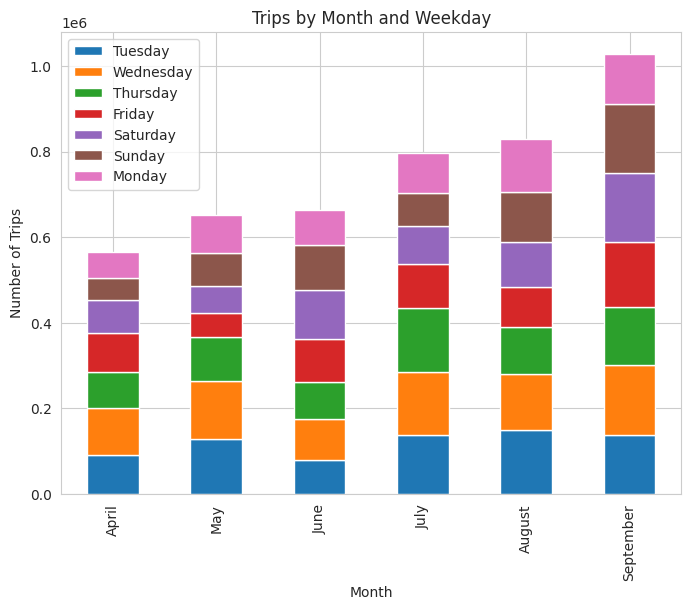

In [ ]:
df_month_weekday.plot(kind='bar', figsize=(8,6), stacked = True)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')

plt.show()

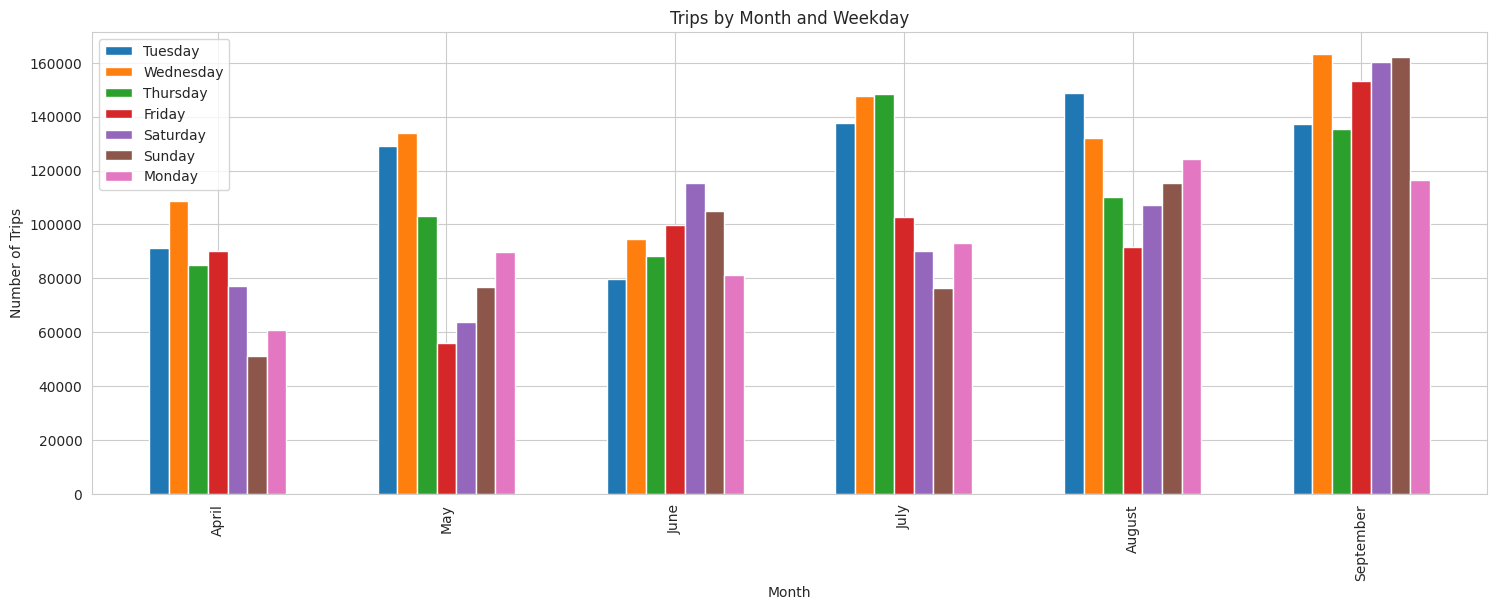

In [ ]:
df_month_weekday.plot(kind='bar', figsize=(18,6), width = 0.6)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')

plt.show()

3. ****Conclusion****


Through our analysis of the Uber Pickups in New York City data set in 2014, we managed to get the following informations:

The peak demand hour 17:00.
The main customer category are workers.
An indicator of Uber's improvement from April to September.
People tend to use Uber to go to work around 7:00 and 8:00 on working days.
People tend to use Uber late at night (around midnight) during weekends.
We should investigate why people don't use uber on Mondays as much as they do on other working days.
We plan to use more adapted tools in the future, such as heatmaps and machine learning algorithms in order to extract more insights.

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.11.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
ERROR: https://github.com/matplotlib/basemap/archive/master.zip does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [ ]:
!git clone https://github.com/matplotlib/basemap.git

Cloning into 'basemap'...
remote: Enumerating objects: 24373, done.
remote: Counting objects: 100% (4443/4443), done.
remote: Compressing objects: 100% (1763/1763), done.
remote: Total 24373 (delta 2568), reused 4247 (delta 2426), pack-reused 19930
Receiving objects: 100% (24373/24373), 874.30 MiB | 23.38 MiB/s, done.
Resolving deltas: 100% (14281/14281), done.
Updating files: 100% (323/323), done.


In [ ]:
cd basemap

/content/basemap


In [ ]:
!python setup.py install

python3: can't open file '/content/basemap/setup.py': [Errno 2] No such file or directory


In [ ]:
!pip install pyproj==1.9.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 29.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyproj
  Running setup.py clean for pyproj
Failed to build pyproj
ERROR: Could not build wheels for pyproj, which is required to install pyproject.toml-based projects


In [ ]:
pip install pyproject.toml-based projects

ERROR: Could not find a version that satisfies the requirement pyproject.toml-based (from versions: none)
ERROR: No matching distribution found for pyproject.toml-based


# Uber Data Analysis using Python-**PHASE II**
**bold text**

It contains more in depth visualizations ( Heatmaps, spatial visualizations and animation ) of the Uber Pickups in New York City data set.

The analysis is broken up into 3 sections:

Data Loading and Preparation ( same as the " Uber Basic Data Analysis " notebook ).
Cross Analysis through heatmaps.
Spatial visualization and animation.

### 1.1 Loading Modules

In [ ]:
import pandas as pd
import numpy as np

#Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

#The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python
from mpl_toolkits.basemap import Basemap
from matplotlib import cm #Colormap

#Animation Modules
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

%matplotlib inline

 ## 2.Cross Analysis

 Through our exploration we are going to visualize:
- Heatmap by Hour and Day.
- Heatmap by Hour and Weekday.
- Heatmap by Month and Day.
- Heatmap by Month and Weekday.

In [ ]:
#Defining a function that counts the number of rows
def count_rows(rows):
    return len(rows)

### 2.1 Heatmap by Hour and Day

In [ ]:
#Creating the hour and day dataframe
df_hour_day = df.groupby('Hour Day'.split()).apply(count_rows).unstack()
df_hour_day.head()

Day     1     2     3     4     5     6     7     8     9     10  ...    22  \
Hour                                                              ...         
0     3247  2480  3415  2944  2786  4623  3715  2882  2708  3351  ...  2852   
1     1982  1600  2176  1718  1567  2932  2326  1672  1757  2167  ...  1662   
2     1284  1109  1434  1217  1047  1902  1533  1147  1246  1495  ...  1207   
3     1331  1442  1489  1449  1278  1599  1622  1509  1501  1466  ...  1503   
4     1458  1897  1578  1737  1648  1584  1793  1921  1911  1614  ...  1984   

Day     23    24    25    26    27    28    29    30    31  
Hour                                                        
0     2605  3277  2442  3887  5304  4224  2732  2439  2209  
1     1608  2090  1525  3123  3712  2711  1862  1547  1407  
2     1163  1480  1098  2087  2407  1894  1442  1135  1107  
3     1465  1520  1472  1840  2098  1846  1717  1436   935  
4     1994  1825  1972  1770  1759  1916  1990  1864   788  

[5 rows x 31 columns]

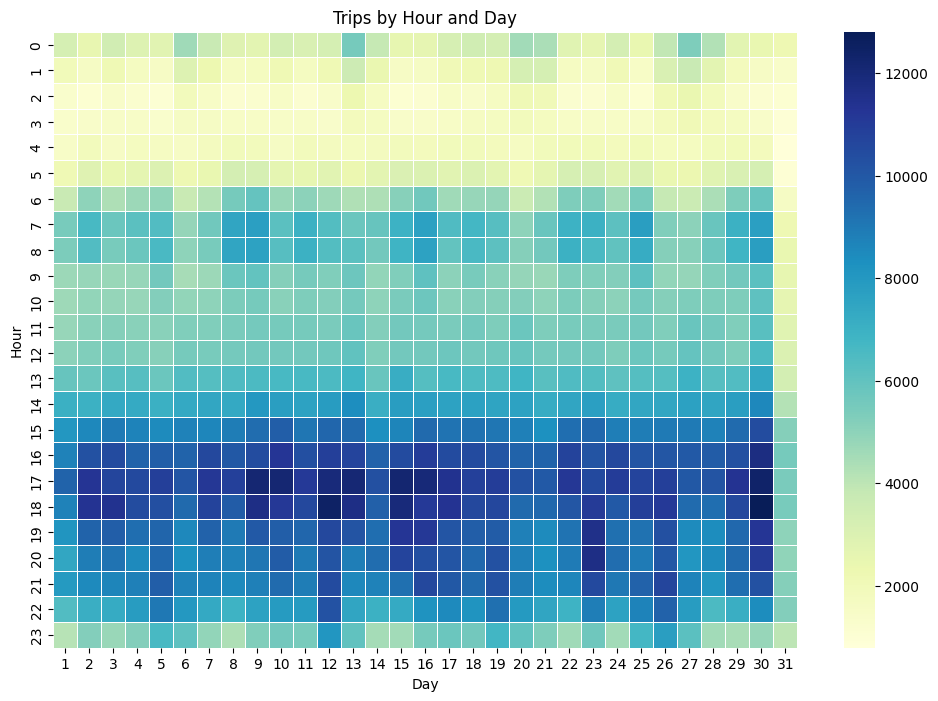

In [ ]:
plt.figure(figsize = (12,8))

#Using the seaborn heatmap function
ax = sns.heatmap(df_hour_day, cmap=cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Hour and Day");

Analysing the results
We see that the number of trips in increasing throughout the day, with a peak demand in the evening between 16:00 and 18:00.

It corresponds to the time where employees finish their work and go home.

2.2 Heatmap by Hour and Weekday

In [ ]:
df_hour_weekday = df.groupby('Hour weekday'.split(), sort = False).apply(count_rows).unstack()
df_hour_weekday.head()

weekday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  Monday
Hour                                                                   
0           6237       7644      9293   13716     27633   32877    6436
1           3509       4324      5290    8163     19189   23015    3737
2           2571       3141      3719    5350     12710   15436    2938
3           4494       4855      5637    6930      9542   10597    6232
4           7548       7511      8505    8806      6846    6374    9640

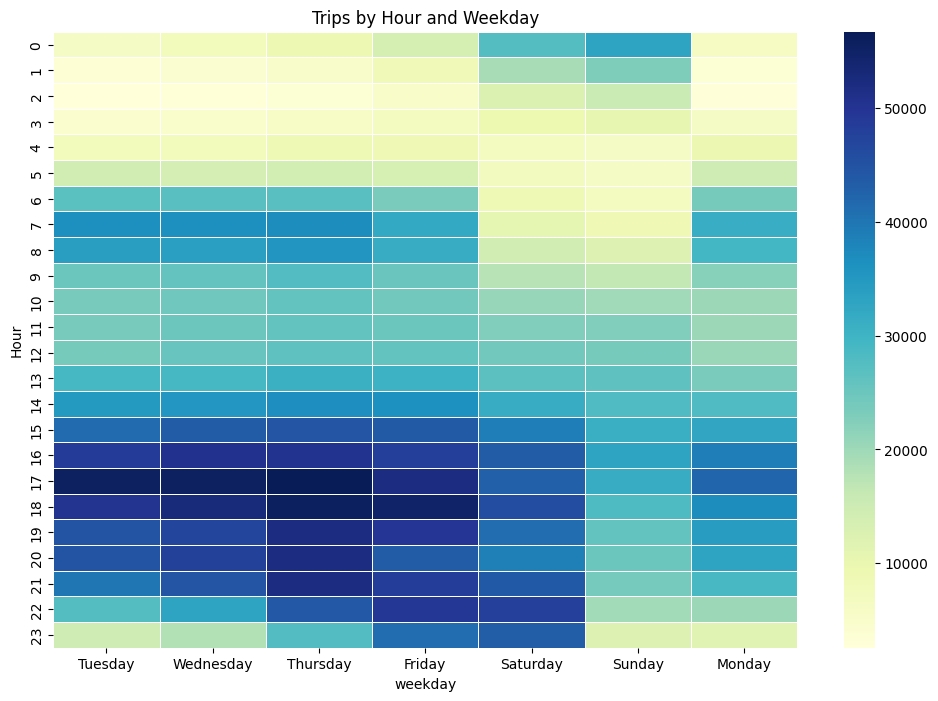

In [ ]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_hour_weekday, cmap=cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Hour and Weekday");

##Analysing the results##
####We can see that on working days (From Monday to Friday) the number of trips is higher from 16:00 to 21:00. It shows even better what we said from the first heatmap.

####On Friday the number of trips remains high until 23:00 and continues on early Saturday. It corresponds to the time where people come out from work, then go out for dinner or drink before the weekend.

####We can notice the same pattern on Saturday, people tend to go out at night, the number of trips remains on high until early Sunday.

### 2.3 Heatmap by Day and Month

In [ ]:
df_day_month = df.groupby('Day Month'.split(), sort = False).apply(count_rows).unstack()
df_day_month.head()

Month        4        5        6        7        8        9
Day                                                        
1      14546.0  23375.0  15967.0  21228.0  32353.0  19961.0
2      17474.0  24235.0  17503.0  26480.0  28678.0  28831.0
3      20701.0  22234.0  22674.0  21597.0  23146.0  32631.0
4      26714.0  13918.0  22831.0  14148.0  24952.0  38360.0
5      19521.0  17859.0  28371.0  10890.0  28094.0  42319.0

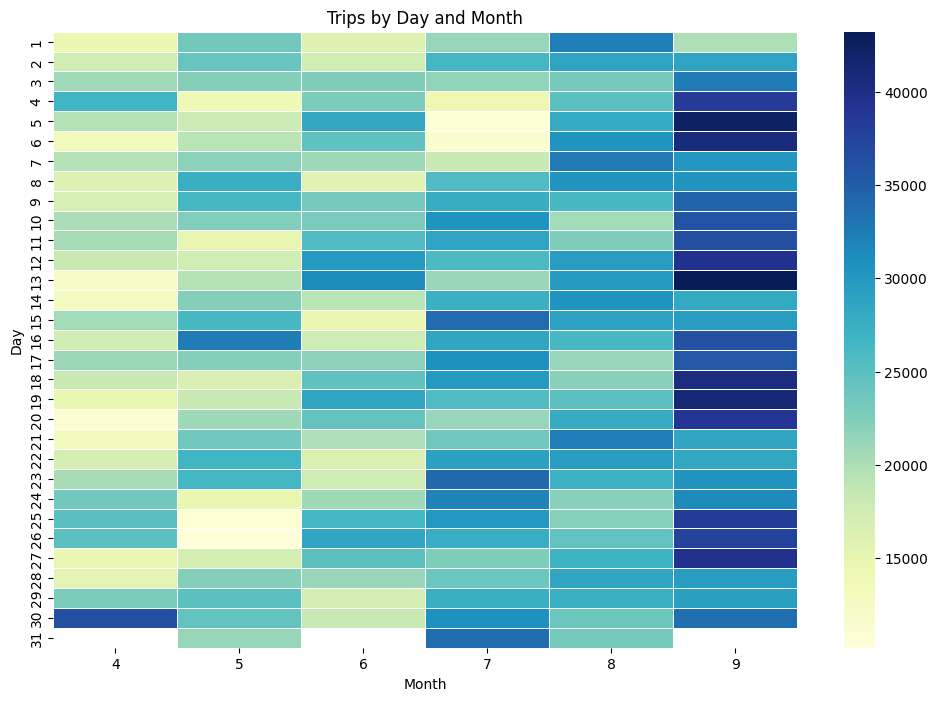

In [ ]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_day_month, cmap = cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Day and Month");

Analysing the results
We observe that the number of trips increases each month, we can say that from April to September 2014, Uber was in a continuous improvement process.

We can notice from the visualization a dark spot, it corresponds to the 30 April. The number of trips that day was extreme compared to the rest of the month.

Unfortunatly we have not been able to find any factual information to explain the pulse. A successful marketing strategy can be assumed to be in place that days. So as the analysis go on we consider that day an outliner.

2.4 Heatmap by Month and Weekday

In [ ]:
df_month_weekday = df.groupby('Month weekday'.split(), sort = False).apply(count_rows).unstack()
df_month_weekday.head()

weekday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  Monday
Month                                                                  
4          91185     108631     85067   90303     77218   51251   60861
5          76662      89857    128921  133991    102990   56168   63846
6          88134      99654    115325  105056     81364   79656   94655
7         137454     147717    148439  102735     90260   76327   93189
8         107124     115256    124117  148674    132225  110246   91633

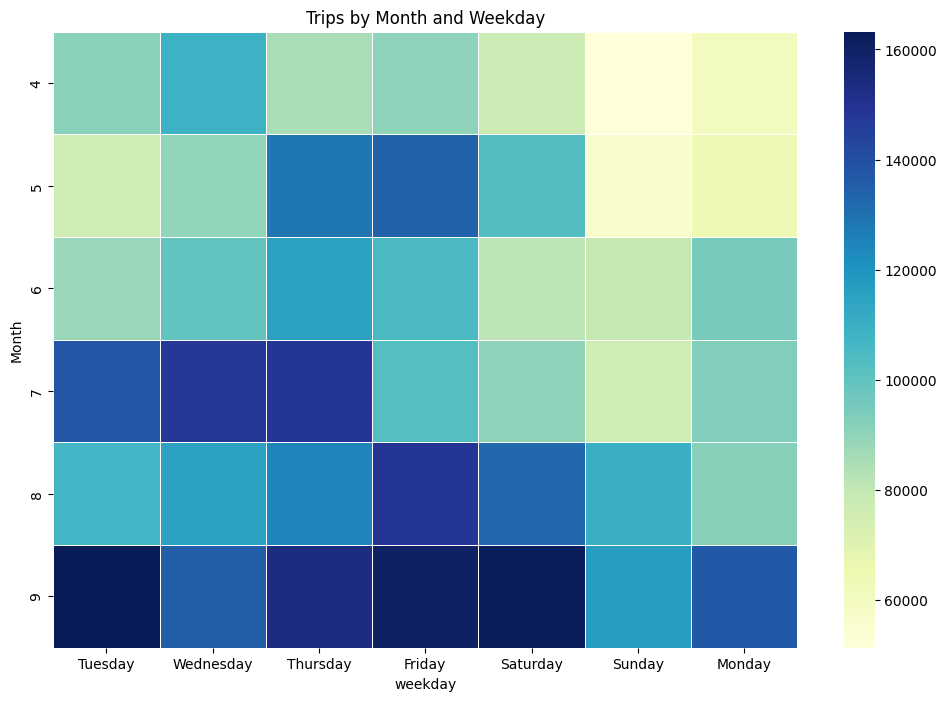

In [ ]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_month_weekday, cmap= cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Month and Weekday");

## 3.Spatial Visualization

In [ ]:

#Setting up the limits
top, bottom, left, right = 41, 40.55, -74.3, -73.6

#Extracting the Longitude and Latitude of each pickup in our dataset
Longitudes = df['Lon'].values
Latitudes  = df['Lat'].values

3.1 Scatter visualization

For our first visualization we can reduce the need in computational power by dropping the duplicates in Latitude and Longitude.

In [ ]:
df_reduced = df.drop_duplicates(['Lat','Lon'])

In [ ]:
#Extracting the Longitude and Latitude of each pickup in our reduced dataset
Longitudes_reduced = df_reduced['Lon']
Latitudes_reduced  = df_reduced['Lat']

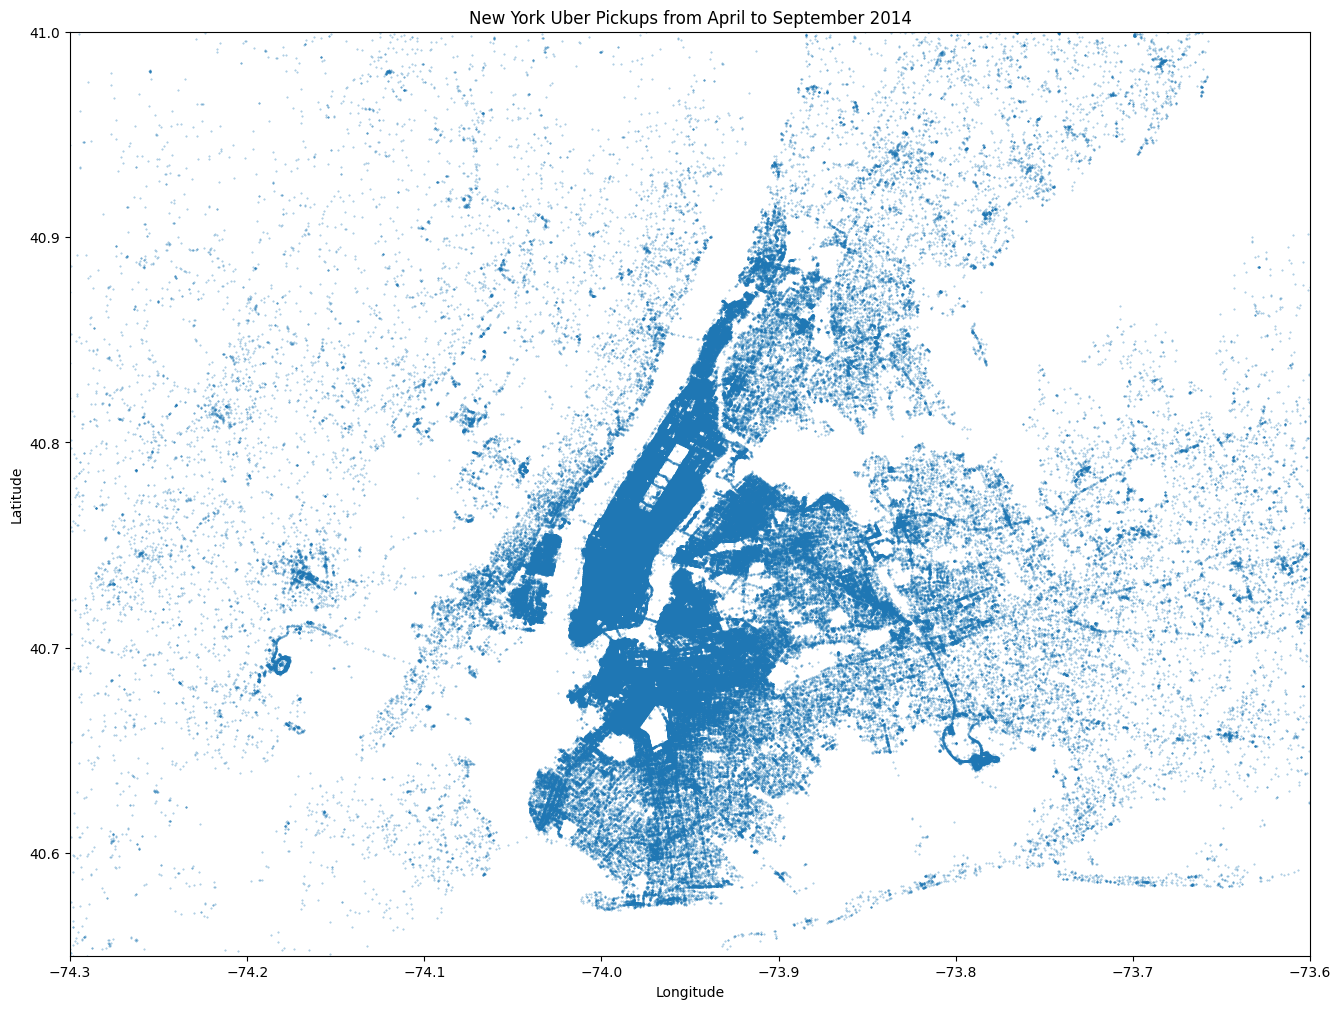

In [ ]:
%matplotlib inline

plt.figure(figsize=(16, 12))

plt.plot(Longitudes_reduced, Latitudes_reduced, '.', ms=.8, alpha=.5)

plt.ylim(top=top, bottom=bottom)
plt.xlim(left=left, right=right)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('New York Uber Pickups from April to September 2014')

plt.show()

### 3.2 Heatmap visualization
This visualization is more demanding in computational power, since we can't use the reduce dataset if we want to get the number of pickups in the heatmap.
We will use Basemap to create the spacial heatmap.

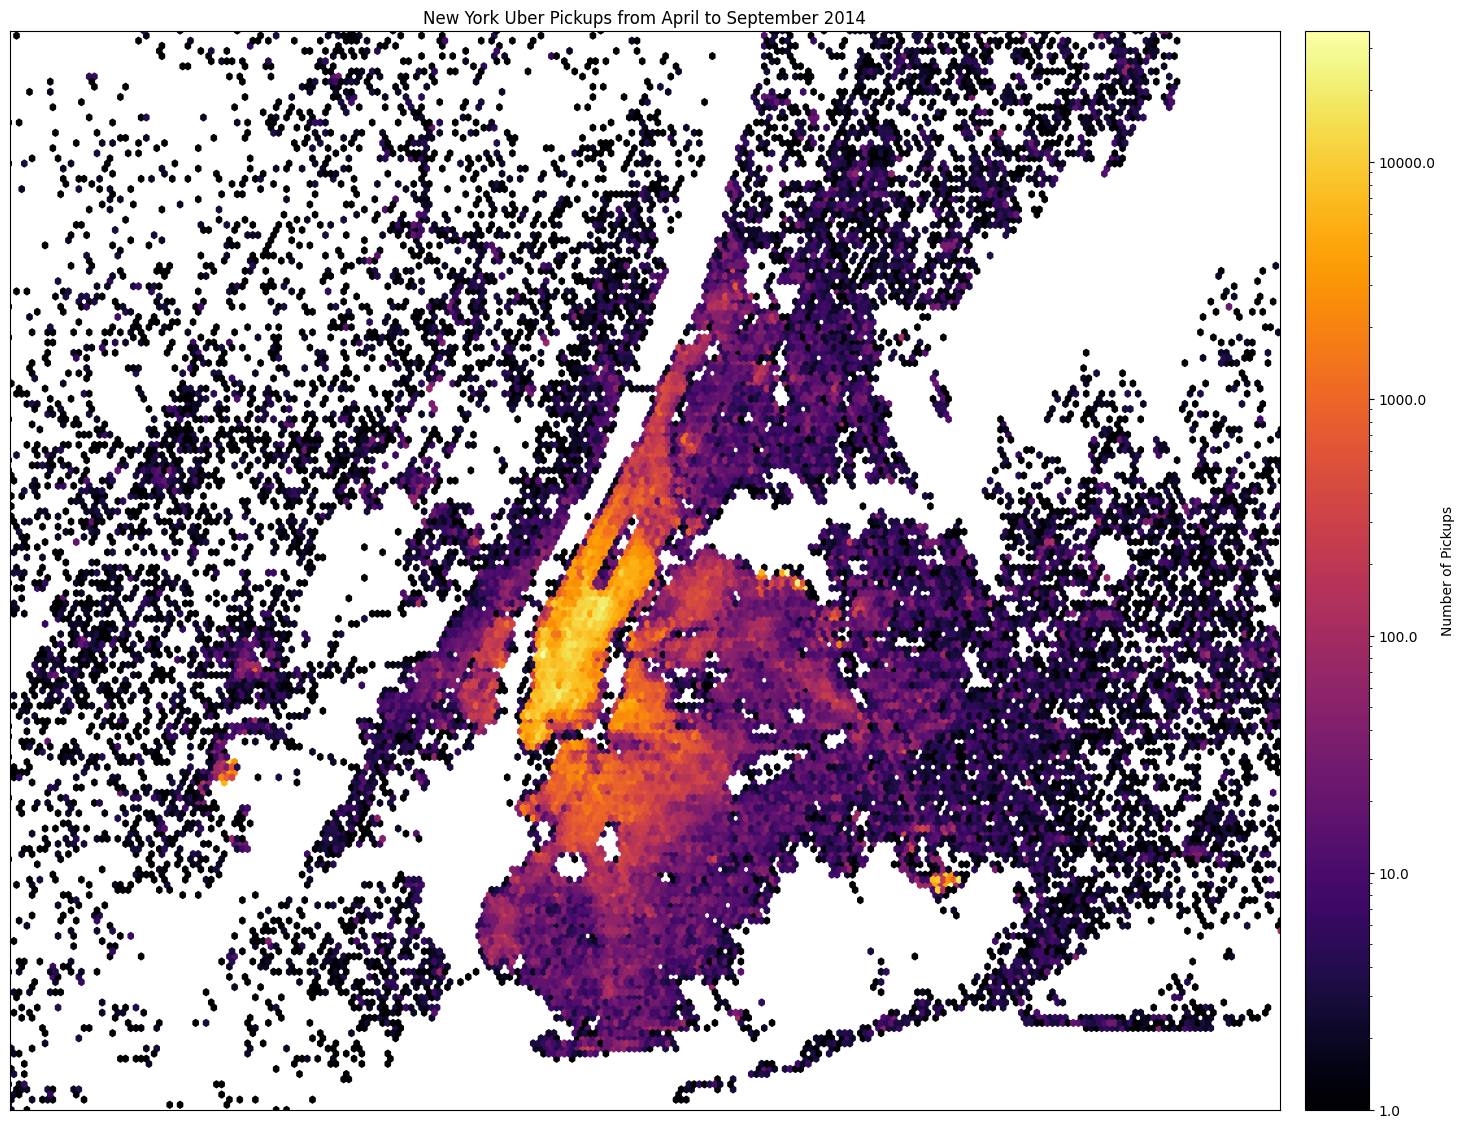

In [ ]:
plt.figure(figsize=(18, 14))
plt.title('New York Uber Pickups from April to September 2014')

#https://matplotlib.org/basemap/api/basemap_api.html
map = Basemap(projection='merc', urcrnrlat=top, llcrnrlat=bottom, llcrnrlon=left, urcrnrlon=right)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.inferno)
map.colorbar(location='right', format='%.1f', label='Number of Pickups');

Analysing the results
From our spacial visualization we observe that:

Most of Uber's trips in New York are made from Midtown to Lower Manhattan.
Followed by Upper Manhattan and the Heights of Brooklyn.
Lastly Jersey City and the rest of Brooklyn.
We see some brighter spots in our heatmap, corresponding to :

LaGuardia Airport in East Elmhurst.
John F. Kennedy International Airport.
Newark Liberty International Airport.
We know that many airports have specific requirements about where customers can be picked up by vehicles on the Uber platform. We can assume that these three airports have them, since they represent a big part of uber's business in new york

##Base Station Analysis

In [ ]:
#BASE ANALYSIS:
base = df['Base'].value_counts()
base = base.to_frame()

In [ ]:
base.rename(columns = {'Base':'Number_of_trips'}, inplace = True)
base['base'] = base.index

In [ ]:
import altair as alt

b1 = alt.Chart(base).mark_bar().encode(
    alt.X('base', title='base'),
    alt.Y('Number_of_trips',title='Number_of_trips')
).properties(
	title="Trip by Bases")


## Clustering Analyisis

In [ ]:
clus = df[['Lat','Lon']].values
print(len(clus))

4534327


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

NameError: name 'inertia' is not defined

<Figure size 1500x600 with 0 Axes>

In [ ]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(clus)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
#Setting up the limits
top, bottom, left, right = 41, 40.55, -74.3, -73.6

In [ ]:
#Extracting the Longitude and Latitude of each pickup in our reduced dataset
Longitudes_reduced = df['Lon']
Latitudes_reduced  = df['Lat']

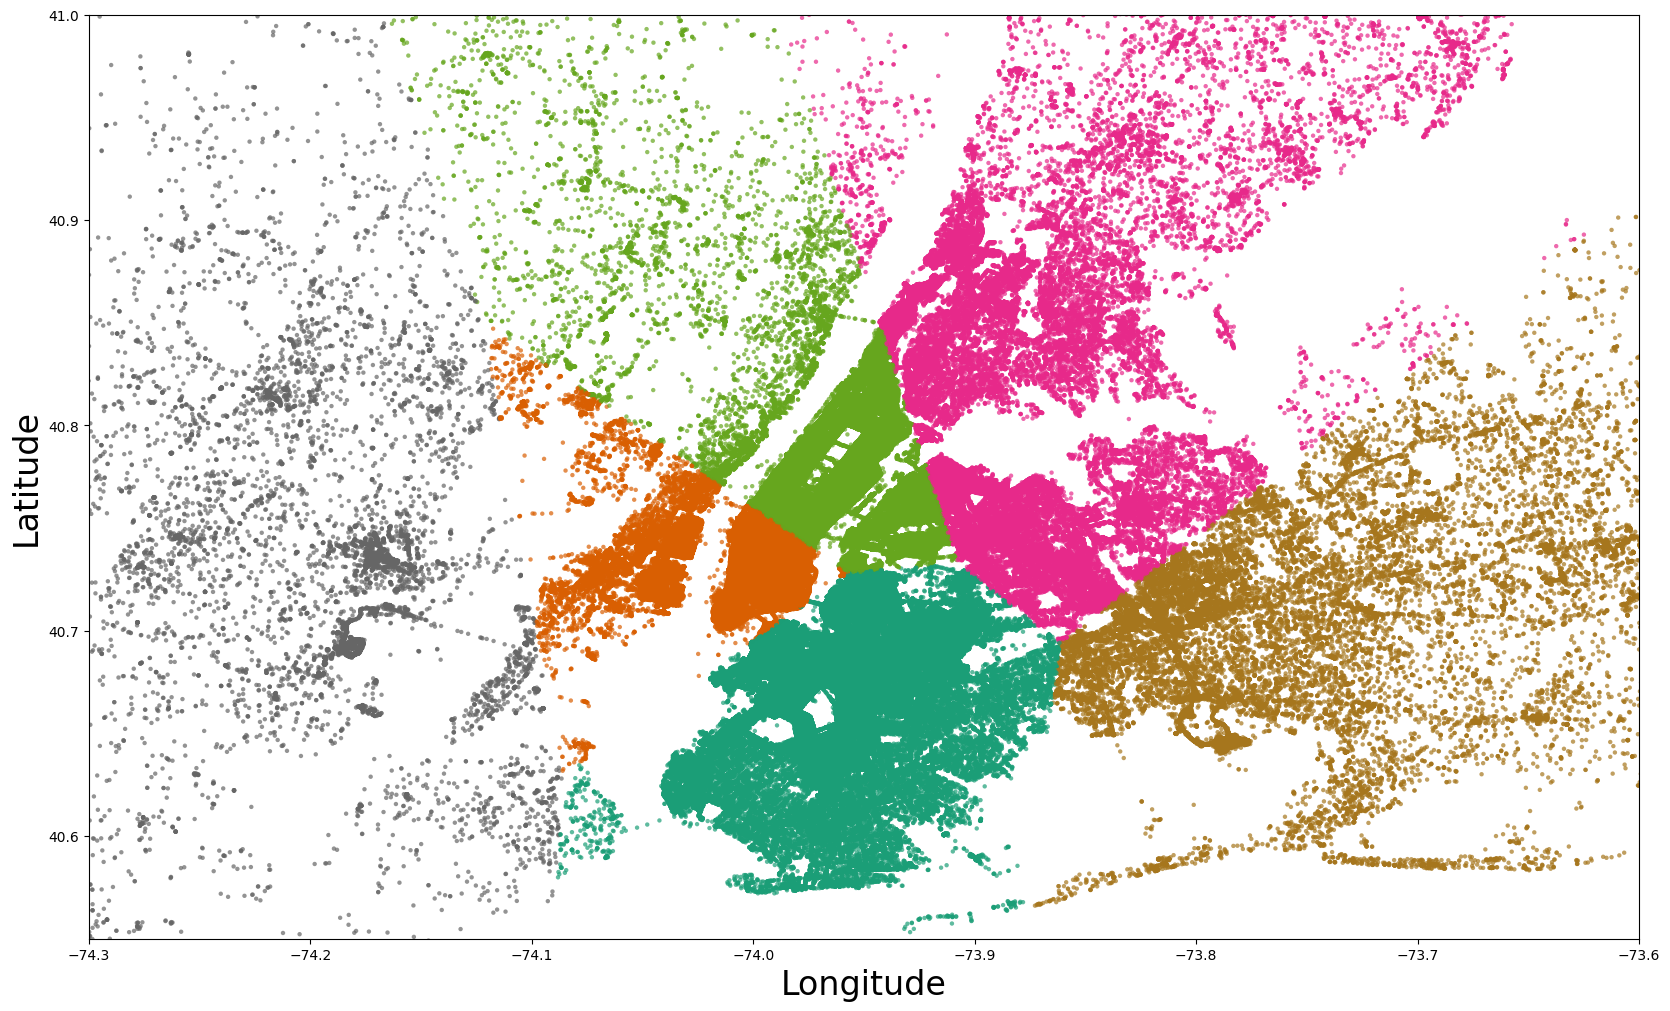

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=[20, 12])
centroid_scatter = ax.scatter(centroids1[:, 0],centroids1[:, 1], marker="o", linewidths=2, c='c', s=120)
facility_scatter = ax.scatter(Longitudes_reduced, Latitudes_reduced, c=algorithm.predict(clus), cmap = cm.Dark2, edgecolor='None', alpha=0.7, s=10)
plt.ylim(top=top, bottom=bottom)
plt.xlim(left=left, right=right)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize = 24)

plt.show()
# display(fig)

In [ ]:
cent = pd.DataFrame(data=centroids1,columns=["lat", "lon"])
cent.head()

lat        lon
0  40.687538 -73.964328
1  40.731445 -73.998028
2  40.796593 -73.872701
3  40.766562 -73.972014
4  40.665365 -73.762510

In [ ]:
import folium
# Converting centroid into lists
centroid = cent.values.tolist()
# Plotting the centroids on google map using Folium library.
map = folium.Map(location=[40.79658011772687, -73.87341741832425], zoom_start = 10)
for point in range(0, len(centroid)):
    folium.Marker(centroid[point], popup = folium.Popup(centroid[point])).add_to(map)
map

In [ ]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster
SF_COORDINATES = (40.79658011772687, -73.87341741832425)


# create empty map zoomed in on San Francisco
map = folium.Map(location=SF_COORDINATES, zoom_start=10)
marker_cluster = MarkerCluster().add_to(map)
cc = df[['Lat','Lon']]
# add a marker for every record in the filtered data, use a clustered view
for each in cc.iterrows():
    folium.Marker(
        location = [each[1]['Lat'],each[1]['Lon']]).add_to(marker_cluster)

display(map)

KeyboardInterrupt: 